# 航空宇宙情報システム学第二： 6月27日課題 (HW2023-05)

今回の課題は、制約なし最適化手法で、非線形最小二乗法による関数当てはめ問題を解いてみるというものです。

リチウムイオン電池の容量$Q$(Ah)は、充電回数$k$とともに次第に低下してきます。
そこで、$Q$を$k$の関数
$$
Q(k) = a \cdot \exp(b \cdot k) + c \cdot \exp(d \cdot k)
$$
で近似的にモデル化することにします。ここで、
$a,b,c,d$がパラメータであり、<font color="red">$a<0$, $b>0$, $c>0$, $d<0$ </font>とします。
(第１項も第２項も単調減少関数になることに注意してください。)

**このバッテリー劣化モデルを、非線形最小二乗法により実験データに当てはめて、パラメータ$a$, $b$, $c$, $d$ の値を求めてください。**

ここで使うバッテリーのデータは、
https://web.calce.umd.edu/batteries/data.htm
にある CS2 データセットを加工したものです。

マイドライブの下に `datasets` というフォルダを作って、そこにデータファイル `CS2_35_caphist.csv, CS2_36_caphist.csv, CS2_37_caphist.csv, CS2_38_caphist.csv`
を置いておくとします。

Pandas を使って読み込むには、次のようにします。

Pandas を使わずに、`open(ファイル名).readlines()` でファイルの中身を読み込んで加工するのでも構いません。

プロットしてみると分かるように、外れ値や変なデータが多少含まれていますが、気にしなくて大丈夫です。

In [ ]:
import numpy.linalg as la

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


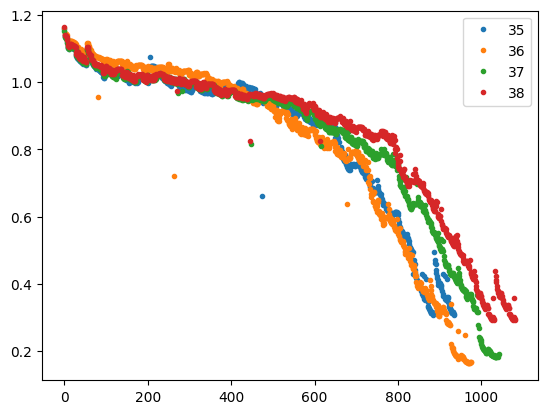

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# フォルダ名
folder = '/content/drive/My Drive/datasets/'

# CS2_35_caphist.csv, CS2_36_caphist.csv, CS2_37_caphist.csv, CS2_38_caphist.csv を
# データフレーム df[0],df[1],df[2],df[3] に読み込む。
bidlst = [35,36,37,38]
df = []
for bid in bidlst:
  fncsv = "CS2_{:2d}_caphist.csv".format(bid)
  df.append(pd.read_csv(folder+fncsv,header=None))

# 全部プロット
plt.figure()
for i in range(4):
  plt.plot(df[i].iloc[:,0],df[i].iloc[:,1],'.',label=str(bidlst[i]))
plt.legend()
plt.show()


`i`番目のバッテリーデータの時刻および容量は、それぞれ、
`df[i].iloc[:,0]`, `df[i].iloc[:,1]`
で得ることができますが、Numpyのarray型オブジェクトに変換して扱うこともできます。その場合、データフレームの`values`属性を使います。

最初のバッテリーの時刻列と容量の時系列をそれぞれ`x`,`y`という配列(ベクトル)に代入するには、

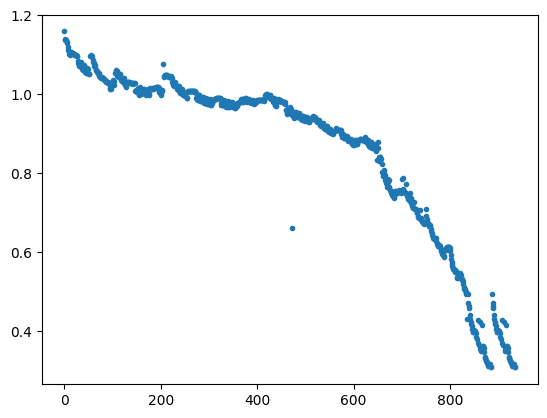

In [ ]:
x = df[0].values[:,0]
y = df[0].values[:,1]

plt.plot(x,y,'.')

当てはめる関数 $Q(k)=a \cdot \exp(b\cdot k) + c \cdot \exp(d\cdot k)$
は、例えば次のようにPythonの関数として定義しておきます。($a$,$b$,$c$,$d$を`alp[0]`〜`alp[3]`で表しています。)

In [ ]:
def Qfun(k,alp):
    Q = alp[0]*np.exp(alp[1]*k)+alp[2]*np.exp(alp[3]*k)
    return Q

例えば、$a=-1.0\times 10^{-3}, b=6.0\times 10^{-3}, c = 0.90, d = -1.0 \times 10^{-4}$
として、このモデルで容量の変化を計算すると次のようになります。

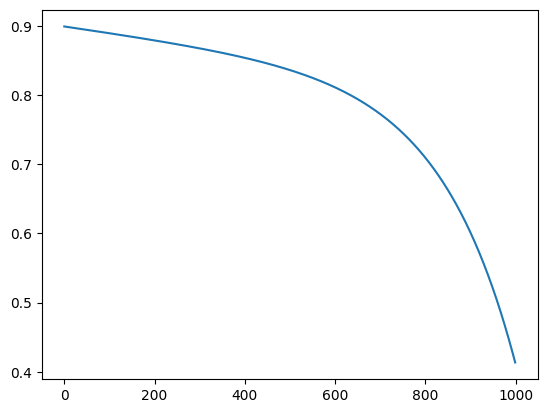

In [ ]:
k = np.arange(0,1000)
alp = [-1e-3, 6e-3, 0.9, -1e-4]
Q = Qfun(k,alp)

plt.figure()
plt.plot(k,Q,'-')
plt.show()

## [課題内容]

各バッテリー実験データごとに、パラメータの値$a,b,c,d$を求めてください。

###(方法1) 残差二乗誤差和を目的関数として最小化アルゴリズムで求める

今回の授業で学んだ最急降下法、ニュートン法、準ニュートン法などを使って、パラメータを推定してみてください。


###(方法2) (任意) 非線形最小二乗法の実装 `scipy.optimize.least_squares` を用いる

余裕があれば、`scipy`に含まれる非線形最小二乗法のソルバー `optimize.least_squares` を使って同じ問題を解いてみて、(方法1)の結果と比較してください。
いろいろなオプションが用意されているので、余裕のある人はいじってみてください。



いずれの場合でも、そこそこ良い初期解を与えることが重要です。


##  [提出期限]
<font color="red">7月18日23時59分までとします。</font>

In [ ]:
x = df[0].values[:,0]
y = df[0].values[:,1]

In [ ]:
def Qfun(k,alp):
    Q = alp[0]*np.exp(alp[1]*k)+alp[2]*np.exp(alp[3]*k)
    return Q

In [ ]:
import sympy as sy
k,a,b,c,d = sy.symbols("k a b c d")
ys = a* sy.exp(b*k) + c*sy.exp(d*k)
sy.Matrix([ys]).jacobian(sy.Matrix([a,b,c,d]))

Matrix([[exp(b*k), a*k*exp(b*k), exp(d*k), c*k*exp(d*k)]])

In [ ]:
# ヤコブ行列を計算する関数
def Jacobian(ti,a):
    j1 = np.exp(a[1]*ti)
    j2 = a[0]*ti*np.exp(a[1]*ti)
    j3 = np.exp(a[3]*ti)
    j4 = a[2]*ti*np.exp(a[3]*ti)
    return np.array([j1,j2,j3,j4]).T

sum of squared residuals: 393.8553022799713
[-9.74273992e-03  5.26486958e-03  1.06226281e+00  5.77959515e-06]
433.025339696917
sum of squared residuals: 16.785902676061433
[-1.51331187e-02  4.26354865e-03  1.06768590e+00  1.37783305e-05]
259.73894311304184
sum of squared residuals: 1.3372529071232493
[-2.12277636e-02  3.87439843e-03  1.07655766e+00  1.46742724e-05]
19.294596398071526
sum of squared residuals: 1.293294131308044
[-1.88892423e-02  4.03849406e-03  1.07599586e+00 -5.51568408e-06]
0.07014373938985935
sum of squared residuals: 1.006667701932611
[-2.04266800e-02  3.96946338e-03  1.07686961e+00  3.85001490e-06]
0.23253100313490302
sum of squared residuals: 1.003996281477175
[-1.99480682e-02  3.99373100e-03  1.07665657e+00  3.99486838e-07]
0.001135397607264911
sum of squared residuals: 1.0033105205202724
[-2.01388828e-02  3.98533440e-03  1.07675386e+00  1.66581103e-06]
0.0005750685298280904
sum of squared residuals: 1.0033028274096554
[-2.00766266e-02  3.98818109e-03  1.07672332

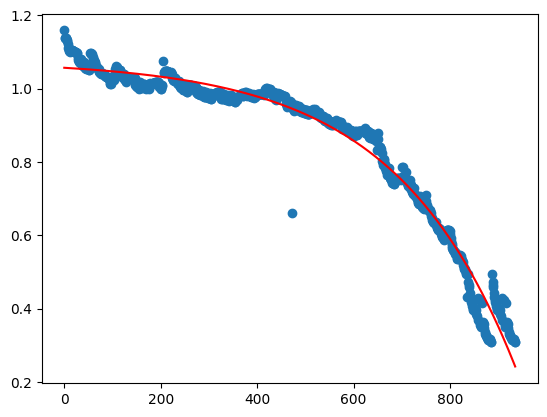

In [ ]:
# 反復計算の履歴を残すためのリスト
hist_sq = []
# パラメータ推定値の初期値を設定
alp = np.array([-1e-2, 6e-3, 0.9, -1e-4])
# 収束判定のため
res = np.ones(len(x))
for it in range(30):
    # 現在のパラメータでyを予測
    res,respre = y - Qfun(x,alp),res
    # 残差二乗和
    sq = np.vdot(res,res)
    hist_sq.append(sq)
    print('sum of squared residuals: {}'.format(sq))
    J = Jacobian(x,alp)
    # ここが最大のポイント
    dlta = la.solve(np.dot(J.T,J),np.dot(J.T,res))
    alp += dlta
    print(alp)
    # 前回からの差分
    dif = res - respre
    print(np.vdot(dif,dif))
    if np.vdot(dif,dif) < 1.0e-6:
        print('Converged')
        break
# 回帰結果を使って再推定
yhat = Qfun(x,alp)
plt.plot(x,y,'o')
plt.plot(x,yhat,'r-')